In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def poly2_poly4_compare(x, y, *, scatter_kwargs=None, line_kwargs=None):
    """
    Fit y = a*x^2 + c and y = a*x^4 + c to (x, y) data and plot the fits
    with residuals.

    Parameters
    ----------
    x, y : 1-dimensional array-like
        Input and output data of equal length.
    scatter_kwargs, line_kwargs : dict, optional
        Extra keyword arguments forwarded to `ax.scatter` and `ax.plot`
        (e.g. marker size, alpha, linestyle).

    Returns
    -------
    (a2, c2), (a4, c4) : tuple of fit parameters
        Best-fit coefficients for the quadratic and quartic models.
    """

    x   = np.asarray(x, dtype=float).ravel()
    y   = np.asarray(y, dtype=float).ravel()
    N   = len(x)
    if len(y) != N:
        raise ValueError("x and y must have the same length")

    # --- helper for linear least-squares with one basis function + constant
    def fit_basis(basis):
        M   = np.vstack([basis, np.ones_like(x)]).T         # design matrix
        coeff, *_ = np.linalg.lstsq(M, y, rcond=None)       # [a, c]
        y_hat   = M @ coeff
        resid   = y - y_hat
        r2      = 1.0 - resid.dot(resid) / np.square(y - y.mean()).sum()
        return coeff, y_hat, resid, r2

    (a2, c2), y2, r2_resid, R2_quad = fit_basis(x**2)
    (a4, c4), y4, r4_resid, R2_quar = fit_basis(x**4)

    # ---------- Plotting ----------
    scatter_kwargs = scatter_kwargs or dict(s=25, alpha=0.8)
    line_kwargs    = line_kwargs    or dict(lw=2)

    fig = plt.figure(constrained_layout=True, figsize=(10, 5))
    gs  = GridSpec(2, 2, height_ratios=[3, 1], figure=fig)

    # Quadratic fit (left)
    ax_q = fig.add_subplot(gs[0, 0])
    ax_q.scatter(x, y, label="data", **scatter_kwargs)
    ax_q.plot(np.sort(x), y2[np.argsort(x)], label=f"fit  $R^2={R2_quad:.4f}$", **line_kwargs)
    ax_q.set_title(r"$y = a_2 x^2 + c_2$")
    ax_q.legend()
    ax_q.set_ylabel("y")

    # Quartic fit (right)
    ax_4 = fig.add_subplot(gs[0, 1])
    ax_4.scatter(x, y, label="data", **scatter_kwargs)
    ax_4.plot(np.sort(x), y4[np.argsort(x)], label=f"fit  $R^2={R2_quar:.4f}$", **line_kwargs)
    ax_4.set_title(r"$y = a_4 x^4 + c_4$")
    ax_4.legend()

    # Residuals
    ax_qr = fig.add_subplot(gs[1, 0], sharex=ax_q)
    ax_qr.axhline(0, lw=0.8, color="k")
    ax_qr.scatter(x, r2_resid, **scatter_kwargs)
    ax_qr.set_xlabel("x")
    ax_qr.set_ylabel("residual")

    ax_4r = fig.add_subplot(gs[1, 1], sharex=ax_4)
    ax_4r.axhline(0, lw=0.8, color="k")
    ax_4r.scatter(x, r4_resid, **scatter_kwargs)
    ax_4r.set_xlabel("x")

    plt.show()

    return (a2, c2), (a4, c4)


In [6]:
N_K = 201
K_values = np.linspace(-np.pi/8, np.pi/8, N_K)
data = np.load('020725_bands_combined.npy')
bound_band = data.T[-1]

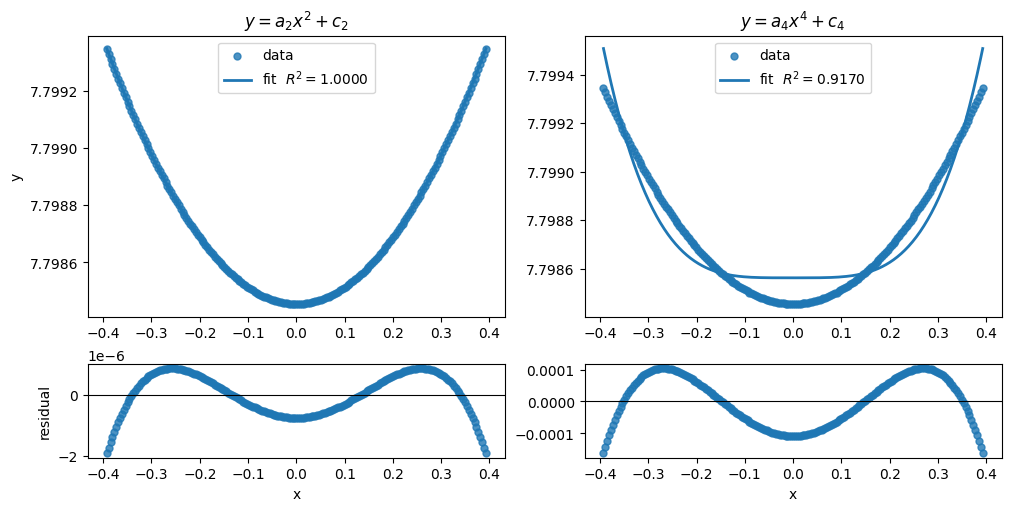

((np.float64(0.005785330025636089), np.float64(7.798455283281433)),
 (np.float64(0.039771974326987966), np.float64(7.798562683913696)))

In [8]:
poly2_poly4_compare(K_values,bound_band)